In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Dataset/Implemented Dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,156,33.6,50,1
1,1,85,66,29,156,26.6,31,0
2,8,183,64,29,156,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [6]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_11896\3307184699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_11896\3307184699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


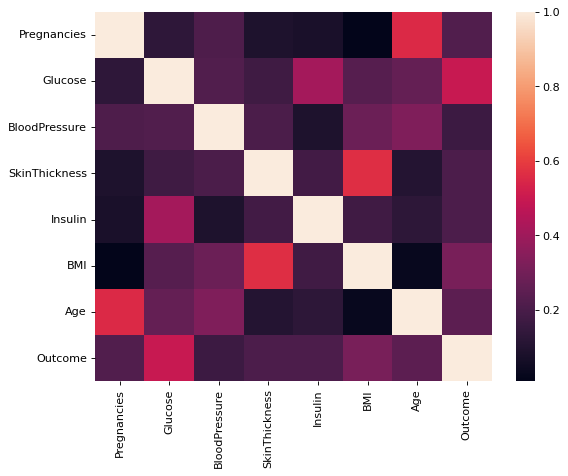

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

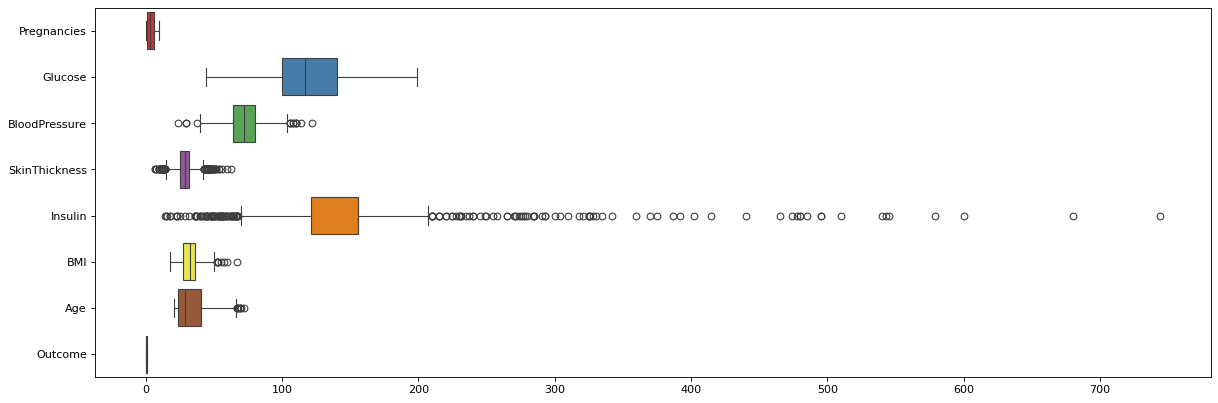

In [8]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h",
            palette="Set1")

plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

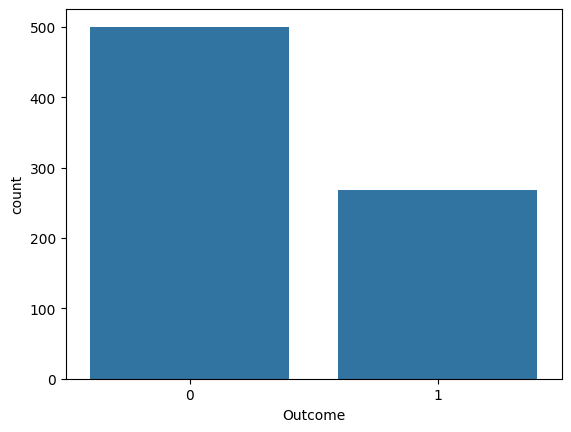

In [9]:
sns.countplot(x="Outcome", data=df)


In [10]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#max_depth=None, min_samples_split=30, n_estimators=200,random_state = 0)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.7922077922077922

In [14]:
y_pred=rfc.predict(X_test)


<Axes: >

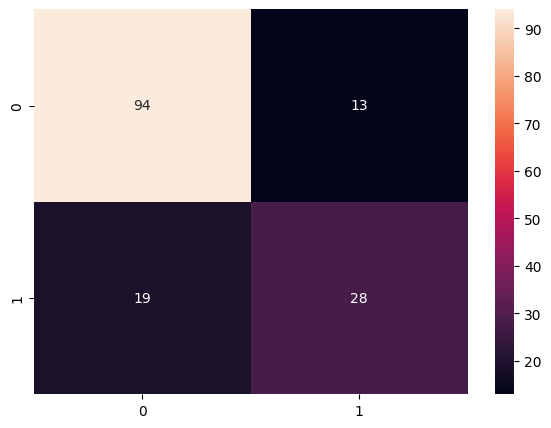

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

In [16]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.83      0.88      0.85       107
      Normal       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [17]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

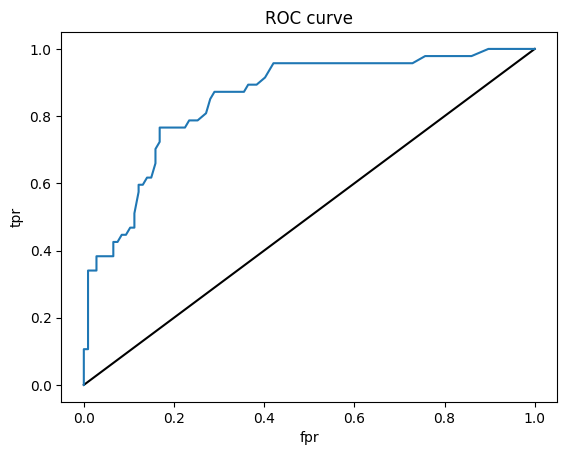

In [18]:
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()